# Good Seed Supermarkets

## Identifying Clients with Artificial Vision Machine Learning Models


## Inicialización

Primero procedemos a importar Librerías:

In [1]:
# Inicialización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
# Cargamos las etiquetas
labels_path = '/datasets/faces/labels.csv'
labels_df = pd.read_csv(labels_path)

In [3]:
# Vemos las primeras filas del DataFrame para verificar que se ha cargado correctamente
print(labels_df.head())

    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17


In [4]:
# Obtenemos el tamaño del conjunto de datos
num_filas, num_columnas = labels_df.shape
print(f'Tamaño del conjunto de datos: {num_filas} filas, {num_columnas} columnas')

Tamaño del conjunto de datos: 7591 filas, 2 columnas


In [5]:
# Imprimimos la información general/resumida del conjunto de datos.
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [6]:
# Verificamos que no hay filas totalmente duplicadas: 
print('El número de filas totalmente duplicadas en el Conjunto de datos es:', labels_df.duplicated().sum())

El número de filas totalmente duplicadas en el Conjunto de datos es: 0


In [7]:
#Verificamos que no hay valores ausentes.
print("Valores Ausentes Conjunto de Datos", labels_df.isna().sum())

Valores Ausentes Conjunto de Datos file_name    0
real_age     0
dtype: int64


In [8]:
# Configuración del generador de imágenes
image_dir = '/datasets/faces/final_files/'

datagen = ImageDataGenerator(rescale=1./255)  # Normalizar los valores de los píxeles entre 0 y 1

# Creamos un generador para cargar las imágenes desde el DataFrame
image_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=image_dir,
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),  # Ajustamos el tamaño según sea necesario
    batch_size=32,          # Tamaño del lote
    class_mode='raw',      # Usamos 'raw' para regresión (edad continua)
    shuffle=False,         # No barajar, las imágenes se cargan en el orden en que están en el DataFrame.
    seed=12345             # Configuramos un generador de números aleatorios para reproducibilidad.
)


Found 7591 validated image filenames.


## EDA

### Distribución de Edad

Vamos a crear un histograma para explorar la distribución de edades en el conjunto de datos. Esto nos dará una idea de cómo están distribuidas las edades y si hay algún sesgo en el conjunto de datos:

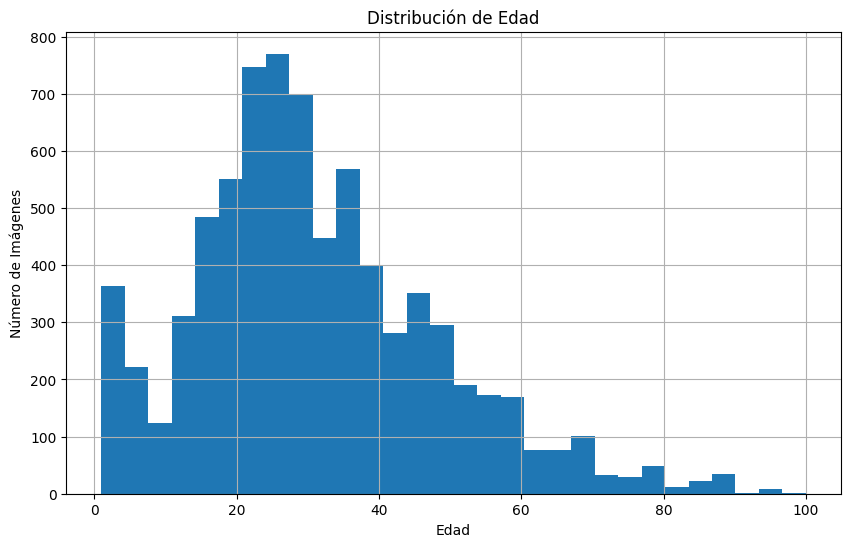

In [9]:
# Distribución de edad
plt.figure(figsize=(10, 6))
labels_df['real_age'].hist(bins=30)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Imágenes')
plt.grid(True)
plt.show()

Análisis de la Distribución de Edad

- La mayoría de las imágenes están en el rango de 20 a 30 años. Esto podría indicar que el modelo tendrá más datos para entrenar en este rango de edades, lo cual es bueno para la precisión en ese grupo.
- Se presenta una distribución asimétrica debido a que hay un sesgo hacia edades más jóvenes. Los datos son menos frecuentes a medida que aumentamos la edad, especialmente para edades mayores de 60 años. Esto podría afectar la capacidad del modelo para generalizar bien en esos rangos.
- Vemos que tenemos pocos datos en extremos: Hay relativamente pocos datos para edades menores de 10 años y mayores de 70 años. Esto podría representar un desafío al entrenar el modelo, ya que habrá menos ejemplos para que el modelo aprenda de esos grupos.

### Mostrar Imágenes para Diferentes Edades

Para obtener una impresión general del conjunto de datos, necesitamos mostrar algunas imágenes representativas de diferentes edades. 
Este código permitirá visualizar algunas imágenes con sus edades asociadas, lo que nos dará una impresión general del conjunto de datos.

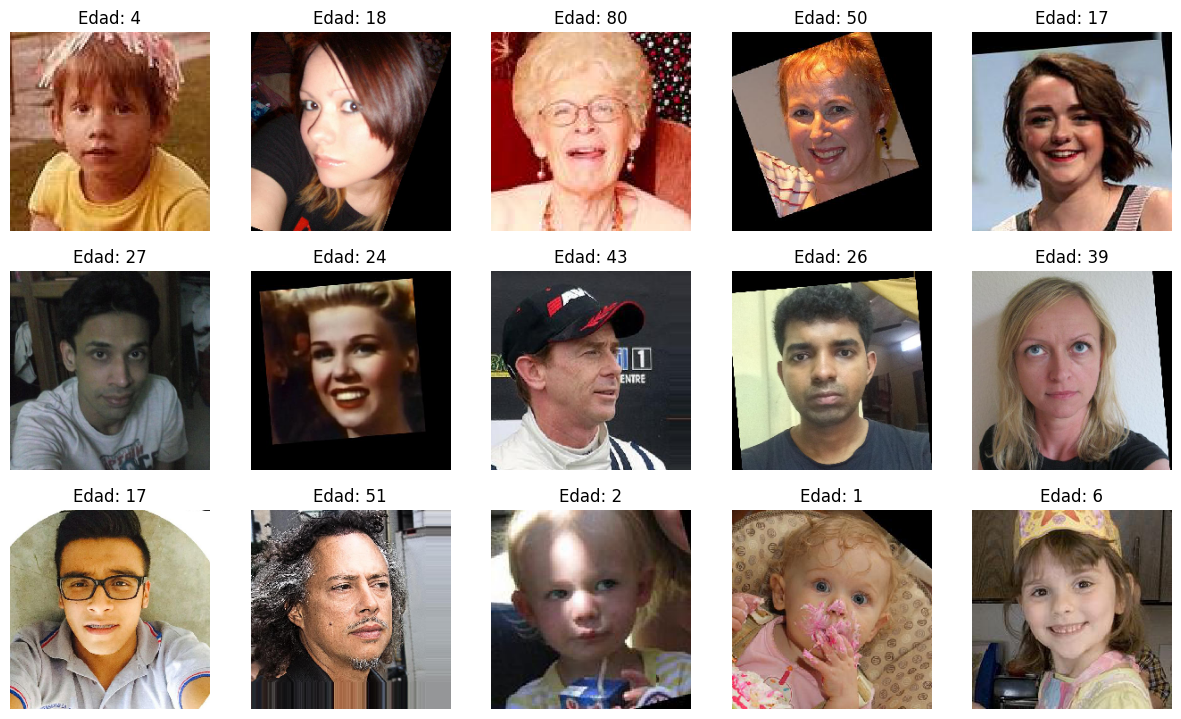

In [11]:
# Función para mostrar imágenes
def show_images(images, labels, num_images=15):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'Edad: {labels[i]}')
        plt.axis('off')
    plt.show()

# Obtener un lote de imágenes
images, labels = next(image_generator)
show_images(images, labels, num_images=15)  # Muestra 15 imágenes

Observaciones de las Imágenes

- Las imágenes incluyen un rango amplio de edades, desde 1 año hasta 80 años. Esto es bueno porque el modelo tendrá ejemplos diversos para aprender.
- Hay variaciones en la calidad de las imágenes. Algunas imágenes pueden estar desenfocadas o tener resoluciones diferentes. Esto podría afectar el rendimiento del modelo.
- Las caras no están siempre perfectamente centradas o en ángulos similares. Esto puede ser un desafío para el modelo, ya que tiene que aprender a reconocer edades a pesar de estas variaciones.
- Las imágenes varían en cuanto al contexto, con diferentes fondos y condiciones de iluminación, lo cual puede ser una buena oportunidad para que el modelo aprenda a generalizar.

### Conclusiones

Con respecto a la Cantidad de Imágenes del Conjunto de Datos vemos que es razonablemente grande con 7591 imágenes, lo cual es beneficioso para entrenar un modelo de aprendizaje. Sin embargo, el tamaño puede representar un desafío en términos de tiempo de entrenamiento y recursos computacionales.

En relación a la Cobertura de Edades, aunque hay un rango de edades amplio, es importante considerar el balance de datos, ya que algunas edades pueden estar subrepresentadas.

En relación a la Distribución de Edad, la mayoría de las imágenes están en el rango de 20 a 30 años, lo que sugiere un sesgo hacia edades más jóvenes. Este sesgo podría influir en la capacidad del modelo para predecir con precisión edades fuera de este rango.

Por otro lado hay menos datos para edades menores de 10 años y mayores de 60 años. Esto puede llevar a un modelo menos preciso en estos rangos de edad debido a la falta de ejemplos suficientes para aprender.

Con respecto a las imágenes, éstas presentan una variabilidad en términos de calidad, iluminación y ángulos. Aunque esta variabilidad puede presentar un desafío, también puede ayudar al modelo a generalizar mejor si se maneja adecuadamente.

Dado que estamos prediciendo edades continuas, se debe utilizar un modelo de regresión. El uso de class_mode='raw' en el generador es apropiado para este tipo de tarea.


## Modelado

Se definen las funciones necesarias para entrenar tu modelo en la plataforma GPU y se crea un solo script que las contenga todas junto con la sección de inicialización.

In [12]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [13]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

In [21]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

In [22]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    
   
    backbone = ResNet50(weights='imagenet',
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


    return model

In [23]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

## Preparación  del script para ejecutarlo en la plataforma GPU

Una vez  definido las funciones necesarias, se redacta un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. 

In [24]:
import inspect

# String de inicialización
init_str = """
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

# Definir la ruta de salida
output_path = 'run_model_on_gpu.py'

# Guardar el script en un archivo
with open(output_path, 'w') as f:
    f.write(init_str)
    f.write('\n\n')
    
    # Escribir el código fuente de las funciones
    for fn_name in [load_train, load_test, create_model, train_model]:
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')
        
    # Añadir el código que falta
    additional_code = '''
# Ruta a los datos
path = 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/faces/'  

# Cargar datos
train_data = load_train(path)
test_data = load_test(path)

# Crear el modelo
input_shape = (224, 224, 3)
model = create_model(input_shape)

# Entrenar el modelo
train_model(model, train_data, test_data)
'''
    f.write(additional_code)

print(f'Script para GPU actualizado y creado: {output_path}')


Script para GPU actualizado y creado: run_model_on_gpu.py


### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

## Conclusiones

Se mantienen las conclusiones obtenidas en el punto 3.3.